In [125]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)

val_array = []
n = 0
beta = .1
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736

with open('data/soc-LiveJournal1counts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    Y1.append(y1+y2*beta)

0.8232966566912501
0.6857228432939062
0.13757381339734387


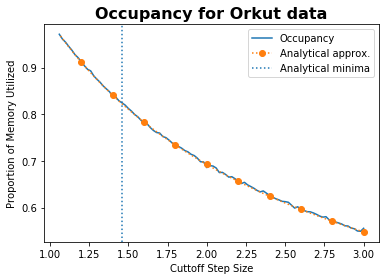

<Figure size 432x288 with 0 Axes>

In [4]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)
occupancy = lambda a : lambda x : ((1-a)/(2-a))*(1-(x-1)/(x-x**(2-a)))

        

val_array = []
n = 0
beta = .1
alpha =  2.0239 
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736

with open('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
_Y1 = []
occupancy = lambda a : lambda x : ((1-a)/(2-a))*(1-(x-1)/(x-x**(2-a)))

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    #y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    #Y1.append(y3/(y1+y3))
    _Y1.append(occupancy(alpha)(i))
    if i==2:
        default_occ = y3/(y1+y3)
i = result_Orkut
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
new_occ = y3/(y1+y3)
print(new_occ)
print(default_occ)
print(new_occ-default_occ)

plt.plot(X,Y1,label = "Occupancy")
plt.plot(X,_Y1,'o:',markevery = 10,label = "Analytical approx.")
#plt.plot(X,_Y2)
plt.axvline(x=result_Orkut,linestyle = ':',label = "Analytical minima")
# Add legend
plt.legend(loc='upper right')
# Add title and x, y labels
plt.title("Occupancy for Orkut data", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Proportion of Memory Utilized")
plt.show()
plt.savefig('results/ungraph_occupancy.png')    
    

0.825481959659864
0.6724860577646703
0.15299590189519374


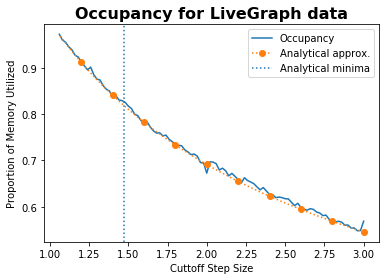

<Figure size 432x288 with 0 Axes>

In [8]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)
occupancy = lambda a : lambda x : ((1-a)/(2-a))*((1-x)/(x-x**(2-a))+1)

        

val_array = []
n = 0
beta = .1
alpha =  2.068
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736

with open('data/soc-LiveJournal1counts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
_Y1 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    Y1.append(y3/(y1+y3))
    _Y1.append(occupancy(alpha)(i))
    if i==2:
        default_occ = y3/(y1+y3)
i = result_Live
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
new_occ = y3/(y1+y3)
print(new_occ)
print(default_occ)
print(new_occ-default_occ)
plt.plot(X,Y1,label = "Occupancy")
plt.plot(X,_Y1,'o:',markevery = 10,label = "Analytical approx.")
#plt.plot(X,_Y2)
plt.axvline(x=result_Live,linestyle = ':',label = "Analytical minima")
# Add legend
plt.legend(loc='upper right')
# Add title and x, y labels
plt.title("Occupancy for LiveGraph data", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Proportion of Memory Utilized")
plt.show()
plt.savefig('results/Live_occupancy.png')    
    

In [16]:
n = 0
beta = .1
alpha =  2.0239
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736
val_array = []

with open('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
_Y1 = []
i = result_Orkut
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
new_comp = y2
i = 2
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
default_comp = y2

print(new_comp)
print(default_comp)
print(default_comp/new_comp)



111.26128720643824
61.750712355325774
0.5550062731231148


In [15]:
n = 0
beta = .1
alpha =  2.0239
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736
val_array = []

with open('data/soc-LiveJournal1counts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
_Y1 = []
i = result_Live
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
new_comp = y2
i = 2
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
default_comp = y2

print(new_comp)
print(default_comp)
print(default_comp/new_comp)



38.92825870830219
22.812519670638086
0.586014387172496
